
# 1. Introduction


### Objective

The objective of our analysis is to unravel the nuances of marketing and campaign effectiveness by exploring the relationship between promotional activities, customer demographics, and purchasing behaviors. We intend to delve into questions such as:

-   Which campaigns have demonstrated substantial influence on purchasing?
-   Are there specific customer demographics that are more responsive to particular campaigns or promotions?
-   What products are most often purchased under promotional campaigns?
-   Is there a noticeable uplift in sales during and after campaigns?

### Significance

Understanding the dynamics of campaign effectiveness allows Regork to:

1.  Allocate marketing budget more judiciously, maximizing ROI.
2.  Tailor future campaigns to be more resonant with specific customer segments.
3.  Identify and optimize the timing, duration, and featured products of campaigns.
4.  Enhance customer engagement and satisfaction by offering relevant promotions.

### Methodology

To navigate through this, we will:

1.  Merge transnational data with campaign and product information, creating a consolidated view of customer purchases in relation to promotional campaigns.
2.  Perform exploratory data analysis to identify patterns, anomalies, or trends in purchasing behavior during campaigns.
3.  Explore customer demographics to understand who is most influenced by campaigns.
4.  Evaluate the impact of promotions on sales volumes during and post-campaign periods.

### Implications

Our analysis will pave the way to:

-   Forge data-driven marketing strategies that amplify sales and customer engagement.
-   Identify opportunities to enhance campaign effectiveness, targeting, and timing.
-   Recognize potential areas for growth and further investment in specific product categories or customer segments.

### Limitations & Further Research

We acknowledge that while our analysis will provide valuable insights, there will be limitations due to data constraints, external factors (like market trends), and intrinsic factors (like customer preferences). Consequently, continuous iterations and further research will be paramount to refining our understanding and recommendations

## 2. Packages/Libraries Required

In [62]:
### Load Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 3. Reading the DataSet

### a. Creating the list containing all the 8 tables 

In [5]:
file = ['dw_transactions', 'dw_promotions', 'dw_products', 'dw_demographics', 'dw_coupons', 'dw_coupon_redemptions', 'dw_campaigns', 'dw_campaign_descriptions']
data = []  # Create a list to store DataFrames

for filename in file:
    df = pd.read_csv(f"{filename}.csv")
    data.append(df)
    print(f'DataFrame for {filename}.csv is:\n{df}')

DataFrame for dw_transactions.csv is:
         household_id  store_id     basket_id  product_id  quantity  \
0                 900       330  3.119857e+10   1095275.0         1   
1                 900       330  3.119857e+10   9878513.0         1   
2                1228       406  3.119866e+10   1041453.0         1   
3                 906       319  3.119871e+10   1020156.0         1   
4                 906       319  3.119871e+10   1053875.0         2   
...               ...       ...           ...         ...       ...   
1469302           679       447  4.145310e+10  14025548.0         1   
1469303          2070       311  4.145308e+10    909894.0         1   
1469304          2070       311  4.145308e+10    933067.0         2   
1469305          2070       311  4.145308e+10   1029743.0         1   
1469306          2070       311  4.145308e+10   1061220.0         1   

         sales_value  retail_disc  coupon_disc  coupon_match_disc  week  \
0               0.50         0.00 

### b. Creating the individual Dataframes for each table.

In [6]:
for i in range(len(data)):
    file[i] = pd.DataFrame(data[i])

### c. Assigning names to the dataframes

In [7]:
transactions = file[0]
promotions = file[1]
products = file[2]
demographics = file[3]
coupons = file[4]
coupon_redemptions = file[5]
campaigns = file[6]
campaign_descriptions = file[7]

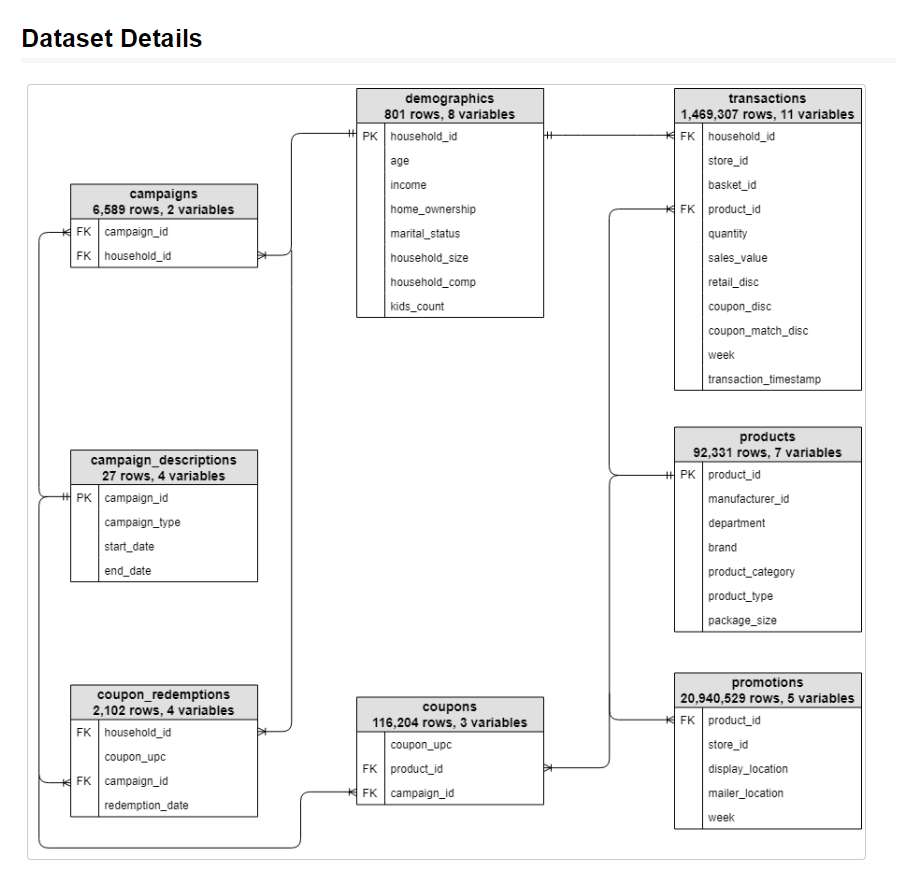

In [19]:
from IPython.display import Image
image_path = "DATASET DETAILS.png"
Image(filename=image_path)

## Business Problem

### 1. In the ever-competitive grocery market, ensuring that marketing campaigns and promotions are not only reaching the target audience but also compelling them to make purchases is crucial. Regork, a national grocery chain, employs various marketing campaigns and promotions to enhance its market reach and elevate sales. However, the effectiveness of these campaigns and the genuine impact they have on purchasing behaviors amongst diverse customer segments remains an intricate puzzle.

In [70]:
## calculating the Net profit and campaign cost 

transactions['campaign_cost'] =  abs(transactions['retail_disc']) + abs(transactions['coupon_disc']) + abs(transactions['coupon_match_disc'])
transactions['net_profit'] = transactions['sales_value'] - 0.5 * transactions['sales_value'] - transactions['campaign_cost']
transactions.head()

,household_id,store_id,basket_id,product_id,quantity,sales_value,retail_disc,coupon_disc,coupon_match_disc,week,transaction_timestamp,campaign_cost,net_profit
0,900,330,3.119857e+10,1095275.0,1,0.50,0.00,0.0,0.0,1,2017-01-01 06:53:26,0.00,0.250
1,900,330,3.119857e+10,9878513.0,1,0.99,0.10,0.0,0.0,1,2017-01-01 07:10:28,0.10,0.395
2,1228,406,3.119866e+10,1041453.0,1,1.43,0.15,0.0,0.0,1,2017-01-01 07:26:30,0.15,0.565
3,906,319,3.119871e+10,1020156.0,1,1.50,0.29,0.0,0.0,1,2017-01-01 07:30:27,0.29,0.460
4,906,319,3.119871e+10,1053875.0,2,2.78,0.80,0.0,0.0,1,2017-01-01 07:30:27,0.80,0.590


### a. Which campaigns have demonstrated substantial influence on purchasing?

In [72]:
coup = pd.merge(transactions,coupon_redemptions,on='household_id',how='left')
coup.head()

,household_id,store_id,basket_id,product_id,quantity,sales_value,retail_disc,coupon_disc,coupon_match_disc,week,transaction_timestamp,campaign_cost,net_profit,coupon_upc,campaign_id,redemption_date
0,900,330,3.119857e+10,1095275.0,1,0.50,0.00,0.0,0.0,1,2017-01-01 06:53:26,0.00,0.250,NaN,NaN,NaN
1,900,330,3.119857e+10,9878513.0,1,0.99,0.10,0.0,0.0,1,2017-01-01 07:10:28,0.10,0.395,NaN,NaN,NaN
2,1228,406,3.119866e+10,1041453.0,1,1.43,0.15,0.0,0.0,1,2017-01-01 07:26:30,0.15,0.565,1.000009e+10,8.0,2017-05-22
3,1228,406,3.119866e+10,1041453.0,1,1.43,0.15,0.0,0.0,1,2017-01-01 07:26:30,0.15,0.565,1.000009e+10,13.0,2017-09-12
4,1228,406,3.119866e+10,1041453.0,1,1.43,0.15,0.0,0.0,1,2017-01-01 07:26:30,0.15,0.565,5.500001e+10,13.0,2017-09-12


### Segregrating the campaign types

In [73]:
camp = pd.merge(coup,campaign_descriptions,on='campaign_id',how='left')
camp.head()

,household_id,store_id,basket_id,product_id,quantity,sales_value,retail_disc,coupon_disc,coupon_match_disc,week,transaction_timestamp,campaign_cost,net_profit,coupon_upc,campaign_id,redemption_date,campaign_type,start_date,end_date
0,900,330,3.119857e+10,1095275.0,1,0.50,0.00,0.0,0.0,1,2017-01-01 06:53:26,0.00,0.250,NaN,NaN,NaN,NaN,NaN,NaN
1,900,330,3.119857e+10,9878513.0,1,0.99,0.10,0.0,0.0,1,2017-01-01 07:10:28,0.10,0.395,NaN,NaN,NaN,NaN,NaN,NaN
2,1228,406,3.119866e+10,1041453.0,1,1.43,0.15,0.0,0.0,1,2017-01-01 07:26:30,0.15,0.565,1.000009e+10,8.0,2017-05-22,Type A,2017-05-08,2017-06-25
3,1228,406,3.119866e+10,1041453.0,1,1.43,0.15,0.0,0.0,1,2017-01-01 07:26:30,0.15,0.565,1.000009e+10,13.0,2017-09-12,Type A,2017-08-08,2017-09-24
4,1228,406,3.119866e+10,1041453.0,1,1.43,0.15,0.0,0.0,1,2017-01-01 07:26:30,0.15,0.565,5.500001e+10,13.0,2017-09-12,Type A,2017-08-08,2017-09-24


### Identifying top 5 performing campaigns

In [127]:
camp_top = camp.groupby(['campaign_type','campaign_id']).agg(total_sales = ('sales_value','sum'),
                                               total_transactions = ('sales_value','count'),
                                               total_quantity = ('quantity','sum'),
                                                total_campaign_cost = ('campaign_cost','sum'),
                                                total_net_profit = ('net_profit','sum')).reset_index()
camp_top['avg_sales_per_transaction'] = camp_top['total_sales']/camp_top['total_transactions']
camp_top= camp_top.sort_values(by=['avg_sales_per_transaction'],ascending=False)
camp_top_5=camp_top.reset_index().head(5)
camp_top_5

,index,campaign_type,campaign_id,total_sales,total_transactions,total_quantity,total_campaign_cost,total_net_profit,avg_sales_per_transaction
0,7,Type B,5.0,83513.50,21478,5522722,13500.22,28256.53,3.888328
1,16,Type B,21.0,13718.22,3565,538802,2044.47,4814.64,3.848028
2,8,Type B,7.0,34216.56,9496,2408805,5549.01,11559.27,3.603260
3,25,Type C,20.0,118849.68,34010,6539531,21578.13,37846.71,3.494551
4,6,Type B,4.0,34425.54,9854,1873141,7427.90,9784.87,3.493560


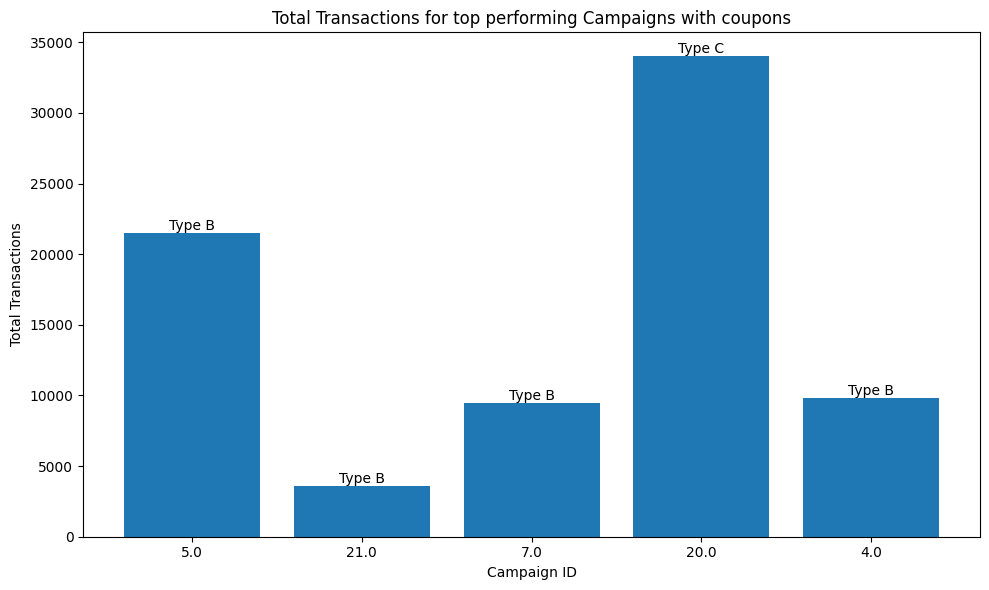

In [135]:
# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(camp_top_5)), camp_top_5['total_transactions'], tick_label=camp_top_5['campaign_id'])
plt.xlabel('Campaign ID')
plt.ylabel('Total Transactions')
plt.title('Total Transactions for top performing Campaigns with coupons')


# Annotate the bars with campaign_type
for i, bar in enumerate(bars):
    plt.text(i, bar.get_height(), camp_top_5['campaign_type'][i], ha='center', va='bottom')

plt.tight_layout()

# Show the plot
plt.show()

### Identifying bottom 5 performing campaigns

In [107]:
camp_bot_5=camp_top.reset_index().tail(5)
camp_bot_5.reset_index(drop=True, inplace=True)
camp_bot_5

,index,campaign_type,campaign_id,total_sales,total_transactions,total_quantity,avg_sales_per_transaction
0,24,Type C,15.0,6141.15,2104,12236,2.918798
1,3,Type A,27.0,240290.81,85977,9283562,2.794827
2,4,Type B,1.0,1727.64,626,747,2.759808
3,22,Type C,6.0,3208.67,1270,1689,2.526512
4,5,Type B,2.0,15646.49,6404,825075,2.443237


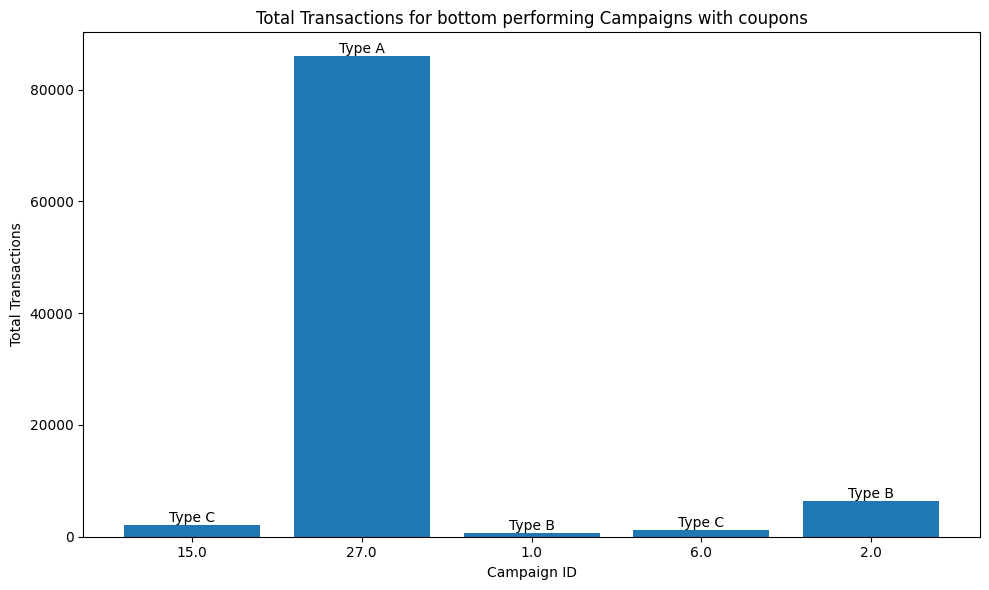

In [108]:
# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(camp_bot_5)), camp_bot_5['total_transactions'], tick_label=camp_bot_5['campaign_id'])
plt.xlabel('Campaign ID')
plt.ylabel('Total Transactions')
plt.title('Total Transactions for bottom performing Campaigns with coupons')


# Annotate the bars with campaign_type
for i, bar in enumerate(bars):
    plt.text(i, bar.get_height(), camp_bot_5['campaign_type'][i], ha='center', va='bottom')

plt.tight_layout()

# Show the plot
plt.show()

### b. Are there specific customer demographics that are more responsive to particular campaigns or promotions?

In [121]:
# Analyze impact per demographic segment and campaign

camp_dem = pd.merge(demographics,camp,on='household_id',how = 'left')
camp_d = camp_dem.groupby(['age','campaign_type']).agg(total_sales = ('sales_value','sum'),
                                                               total_transactions = ('sales_value','count'),
                                                               total_quantity = ('quantity','sum')).reset_index()
camp_d['avg_sales_per_transactions'] = camp_d['total_sales']/camp_d['total_transactions']
camp_d.head()

,age,campaign_type,total_sales,total_transactions,total_quantity,avg_sales_per_transactions
0,19-24,Type A,87245.29,33337,4564051,2.617071
1,19-24,Type B,27148.03,7041,3326677,3.855707
2,19-24,Type C,10546.41,3489,442530,3.022760
3,25-34,Type A,1195803.74,366562,69779611,3.262214
4,25-34,Type B,365256.87,105158,25133876,3.473410


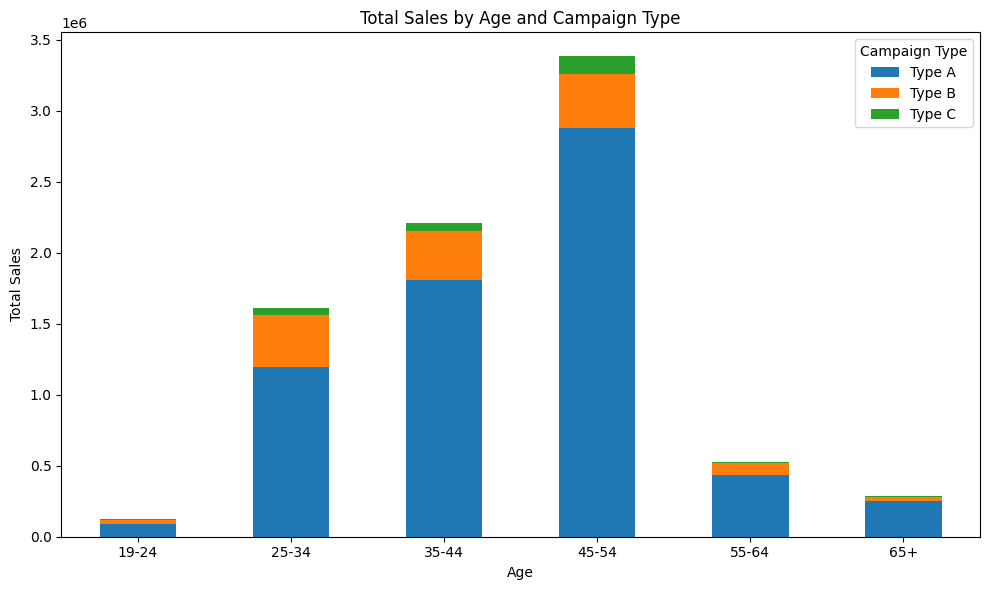

In [122]:
pivot_df = camp_d.pivot(index='age', columns='campaign_type', values='total_sales')

# Create a stacked bar plot
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Age')
plt.ylabel('Total Sales')
plt.title('Total Sales by Age and Campaign Type')
plt.legend(title='Campaign Type', loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

In [123]:
# Analyze impact per demographic segment and campaign

camp_dem = pd.merge(demographics,camp,on='household_id',how = 'left')
camp_i = camp_dem.groupby(['income','campaign_type']).agg(total_sales = ('sales_value','sum'),
                                                               total_transactions = ('sales_value','count'),
                                                               total_quantity = ('quantity','sum')).reset_index()
camp_i['avg_sales_per_transactions'] = camp_d['total_sales']/camp_d['total_transactions']
camp_i.head()

,income,campaign_type,total_sales,total_transactions,total_quantity,avg_sales_per_transactions
0,100-124K,Type A,190923.72,55319,12544322,2.617071
1,100-124K,Type B,9750.75,2885,3594,3.855707
2,125-149K,Type A,526913.41,147726,28945807,3.022760
3,125-149K,Type B,148696.06,42628,6215020,3.262214
4,15-24K,Type A,249548.95,84812,7144195,3.473410


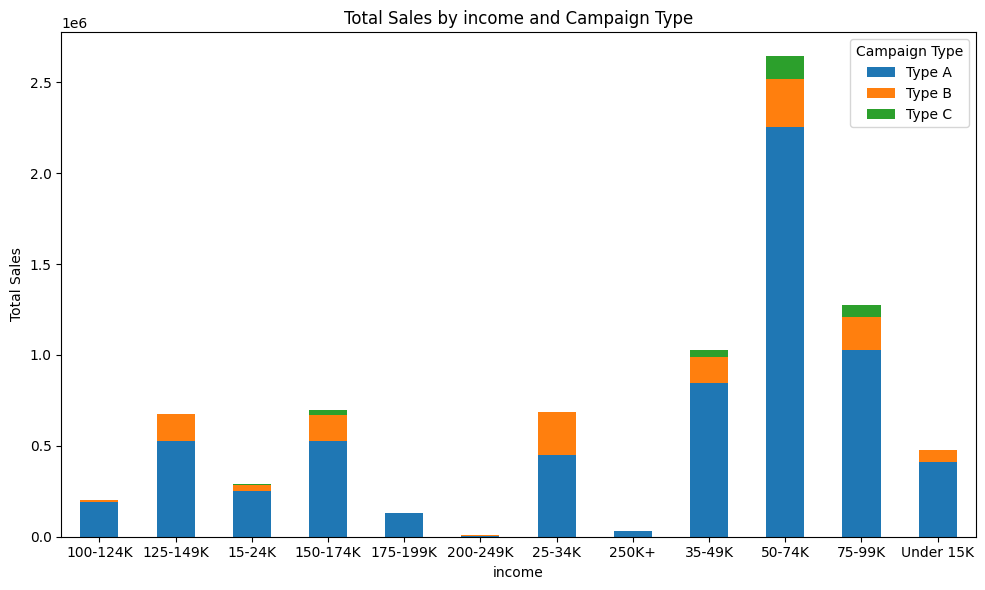

In [126]:
pivot_df = camp_i.pivot(index='income', columns='campaign_type', values='total_sales')

# Create a stacked bar plot
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('income')
plt.ylabel('Total Sales')
plt.title('Total Sales by income and Campaign Type')
plt.legend(title='Campaign Type', loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

### c.ROI Analysis with coupons

In [143]:
camp_t=camp_top.groupby(['campaign_type']).agg(t_net=('total_net_profit','sum'),
                                              t_camp=('total_campaign_cost','sum'),
                                              t_transac=('total_transactions','sum'),
                                              t_sales=('total_sales','sum')).reset_index()
camp_t['ROI%'] = (camp_t['t_net']*100.00/camp_t['t_camp'])-100
camp_t['avg_sales_per_transaction'] = camp_t['t_sales']/camp_t['t_transac']
camp_t.head()

,campaign_type,t_net,t_camp,t_transac,t_sales,ROI%,avg_sales_per_transaction
0,Type A,2352846.33,1541915.07,2435755,7789522.80,52.592473,3.197991
1,Type B,473708.06,290412.07,466197,1528240.26,63.115831,3.278100
2,Type C,108508.39,58621.02,102544,334258.82,85.101505,3.259662


C:\Users\anime\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\anime\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\anime\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Bar Chart: Type C is the profitable campaigns amongst the other campaigns')

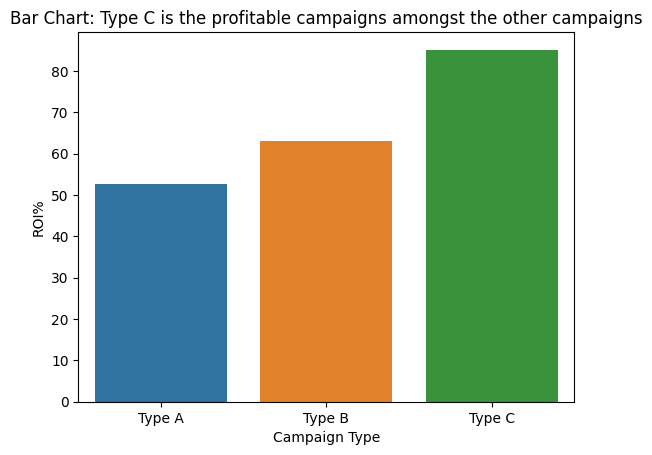

In [141]:
#Plotting the ROI of campaigns

import seaborn as sns

dat = camp_t[["campaign_type","ROI%"]]
ax = sns.barplot(x='campaign_type', y='ROI%', data=dat)

# Rotate x-axis labels by 70 degrees
ax.set_xticklabels(ax.get_xticklabels())

# Add labels and title
plt.xlabel('Campaign Type')
plt.ylabel('ROI%')
plt.title('Bar Chart: Type C is the profitable campaigns amongst the other campaigns')

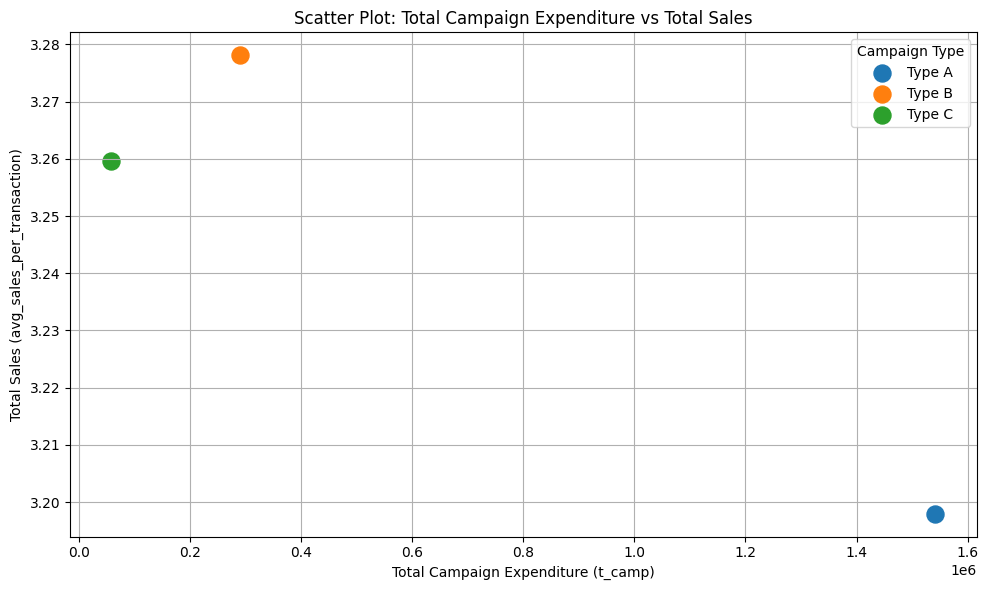

In [146]:
# Create a scatter plot with campaign_type as a legend
plt.figure(figsize=(10, 6))
for campaign_type, group in camp_t.groupby('campaign_type'):
    plt.scatter(group['t_camp'], group['avg_sales_per_transaction'], label=campaign_type, s=150)

plt.xlabel('Total Campaign Expenditure (t_camp)')
plt.ylabel('Total Sales (avg_sales_per_transaction)')
plt.title('Scatter Plot: Total Campaign Expenditure vs Total Sales')
plt.legend(title='Campaign Type')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

## Business Problem

### 2. Maybe a certain demographic group is generating large amounts of revenue for a particular product, and we could invest to capture market share in this area?

In [32]:
#Pulling all the relevant meta data into the transaction table to create a master data

#pulling demographics details
dem_tranc = pd.merge(transactions,demographics,on = 'household_id',how = 'left')

#pulling product details
dem = pd.merge(dem_tranc,products,on = 'product_id',how = 'left')

dem.head(5)

,household_id,store_id,basket_id,product_id,quantity,sales_value,retail_disc,coupon_disc,coupon_match_disc,week,...,marital_status,household_size,household_comp,kids_count,manufacturer_id,department,brand,product_category,product_type,package_size
0,900,330,3.119857e+10,1095275.0,1,0.50,0.00,0.0,0.0,1,...,Married,2,2 Adults No Kids,0,2.0,PASTRY,National,ROLLS,ROLLS: BAGELS,4 OZ
1,900,330,3.119857e+10,9878513.0,1,0.99,0.10,0.0,0.0,1,...,Married,2,2 Adults No Kids,0,69.0,GROCERY,Private,FACIAL TISS/DNR NAPKIN,FACIAL TISSUE & PAPER HANDKE,85 CT
2,1228,406,3.119866e+10,1041453.0,1,1.43,0.15,0.0,0.0,1,...,Unmarried,1,1 Adult No Kids,0,69.0,GROCERY,Private,BAG SNACKS,POTATO CHIPS,11.5 OZ
3,906,319,3.119871e+10,1020156.0,1,1.50,0.29,0.0,0.0,1,...,Married,2,1 Adult Kids,1,2142.0,GROCERY,National,REFRGRATD DOUGH PRODUCTS,REFRIGERATED BAGELS,17.1 OZ
4,906,319,3.119871e+10,1053875.0,2,2.78,0.80,0.0,0.0,1,...,Married,2,1 Adult Kids,1,2326.0,GROCERY,National,SEAFOOD - SHELF STABLE,TUNA,5.0 OZ


In [34]:
#checking the level of data

dem['household_id'] = dem['household_id'].astype('str')
dem['basket_id'] = dem['basket_id'].astype('str')
dem['product_id'] = dem['product_id'].astype('str')
dem['store_id'] = dem['store_id'].astype('str')

dem['key'] = dem['household_id'] + dem['basket_id'] + dem['product_id']

print(dem['key'].nunique())
dem.shape

#The level of data is established to be household_id x basket_id x product_id

1469307


(1469307, 25)

In [35]:
#Checking if we find any trends along the household_id x product_id level

result_df = dem.groupby(['household_id','product_id','department','product_type'])[['quantity','sales_value']].sum().reset_index()
result_df.sort_values(by=['sales_value'],ascending=[False], inplace=True)
result_df['%_contriution'] = result_df['sales_value']/result_df['sales_value'].sum() * 100
result_df

#No significant trend found

,household_id,product_id,department,product_type,quantity,sales_value,%_contriution
9038,1023,6533889.0,MISCELLANEOUS,GASOLINE-REG UNLEADED,2170989,5508.72,0.120002
769816,755,6534178.0,FUEL,GASOLINE-REG UNLEADED,1764902,4384.79,0.095519
40794,1110,1775642.0,DRUG GM,CIGARETTES,84,2644.48,0.057608
417099,2115,6534178.0,FUEL,GASOLINE-REG UNLEADED,1110945,2625.98,0.057205
278858,1762,6534178.0,FUEL,GASOLINE-REG UNLEADED,1077586,2533.16,0.055183
...,...,...,...,...,...,...,...
291140,1787,8019977.0,MEAT-PCKGD,POULTRY,1,0.00,0.000000
682229,539,910032.0,MEAT-PCKGD,PREMIUM - MEAT,0,0.00,0.000000
751596,709,926073.0,PRODUCE,PEARS ASIAN,0,0.00,0.000000
3152,101,1074223.0,GROCERY,SNACK MIX,1,0.00,0.000000


In [36]:
# Finding out the top selling products and their percentage share in total revenue

result_df1 = result_df.groupby(['product_id','department','product_type']).agg(total_sales=('sales_value', 'sum'),
                                                    total_household=('household_id', 'count')).reset_index()
result_df1.sort_values(by = ['total_sales'],ascending = False , inplace = True)
result_df1['revenue'] = result_df1['total_sales'].sum()
result_df1['perc_share'] = (result_df1['total_sales']/result_df1['revenue'])*100.0

print(f'As observed, the Fuel department contributes to the majority of the share to the revenue')
result_df1

As observed, the Fuel department contributes to the majority of the share to the revenue


,product_id,department,product_type,total_sales,total_household,revenue,perc_share
40667,6534178.0,FUEL,GASOLINE-REG UNLEADED,303116.02,1083,4590507.15,6.603105
40637,6533889.0,MISCELLANEOUS,GASOLINE-REG UNLEADED,27467.61,104,4590507.15,0.598357
3853,1029743.0,GROCERY,FLUID MILK WHITE ONLY,22729.71,1114,4590507.15,0.495146
40663,6534166.0,MISCELLANEOUS,GASOLINE-REG UNLEADED,20477.54,126,4590507.15,0.446084
40630,6533765.0,FUEL,GASOLINE-REG UNLEADED,19451.66,264,4590507.15,0.423737
...,...,...,...,...,...,...,...
10269,1087946.0,GROCERY,SOFT DRINKS 20PK&24PK CAN CARB,0.00,1,4590507.15,0.000000
61819,954963.0,PRODUCE,PEPPERS SERRANO,0.00,1,4590507.15,0.000000
5336,1038617.0,COUPON,COUPONS/STORE & MFG,0.00,1,4590507.15,0.000000
21274,13040062.0,DRUG GM,LOREAL COSMETICS,0.00,1,4590507.15,0.000000


In [37]:
## top 10 products in terms of sales revenue 
top_10 = result_df1.head(10)
top_10.reset_index()

,index,product_id,department,product_type,total_sales,total_household,revenue,perc_share
0,40667,6534178.0,FUEL,GASOLINE-REG UNLEADED,303116.02,1083,4590507.15,6.603105
1,40637,6533889.0,MISCELLANEOUS,GASOLINE-REG UNLEADED,27467.61,104,4590507.15,0.598357
2,3853,1029743.0,GROCERY,FLUID MILK WHITE ONLY,22729.71,1114,4590507.15,0.495146
3,40663,6534166.0,MISCELLANEOUS,GASOLINE-REG UNLEADED,20477.54,126,4590507.15,0.446084
4,40630,6533765.0,FUEL,GASOLINE-REG UNLEADED,19451.66,264,4590507.15,0.423737
5,9741,1082185.0,PRODUCE,BANANAS,17219.59,1790,4590507.15,0.375113
6,55725,916122.0,MEAT,CHICKEN BREAST BONELESS,16120.01,861,4590507.15,0.351160
7,11980,1106523.0,GROCERY,FLUID MILK WHITE ONLY,15629.95,803,4590507.15,0.340484
8,67659,995242.0,GROCERY,FLUID MILK WHITE ONLY,15602.59,1153,4590507.15,0.339888
9,37412,5569230.0,GROCERY,SOFT DRINKS 12/18&15PK CAN CAR,13410.46,716,4590507.15,0.292135


C:\Users\anime\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\anime\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\anime\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Bar Chart: Top Selling Products by Revenue Percentage Share')

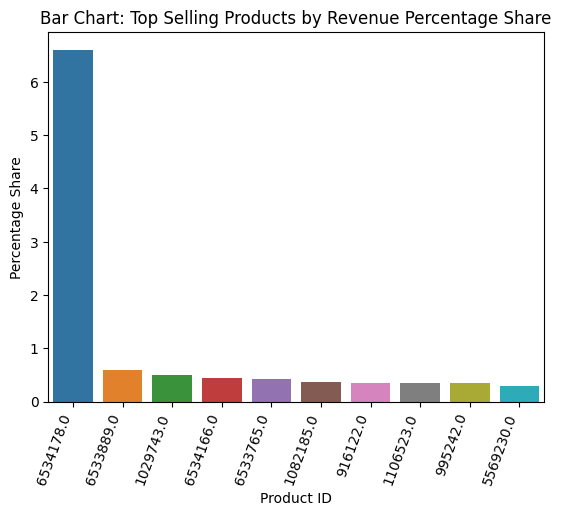

In [38]:
#Plotting the top 10 products by revenue share

import seaborn as sns

data = top_10[["product_id","perc_share"]]
ax = sns.barplot(x='product_id', y='perc_share', data=data)

# Rotate x-axis labels by 70 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha="right")

# Add labels and title
plt.xlabel('Product ID')
plt.ylabel('Percentage Share')
plt.title('Bar Chart: Top Selling Products by Revenue Percentage Share')

## Top selling product EDA

In [39]:
# details of the top selling product
top_10.head(1)

,product_id,department,product_type,total_sales,total_household,revenue,perc_share
40667,6534178.0,FUEL,GASOLINE-REG UNLEADED,303116.02,1083,4590507.15,6.603105


In [47]:
#checking the top 10 households & their details buying the top product 

temp=dem[dem['product_id']=='6534178.0']

pf1 = temp.groupby(['week','age','income','household_comp']).agg(total_qty=('quantity','sum'),
                                                                 total_sales=('sales_value', 'sum'),
                                                                 total_household=('household_id', 'nunique')).reset_index()
pf1.head()

,week,age,income,household_comp,total_qty,total_sales,total_household
0,1,35-44,25-34K,1 Adult No Kids,18192,40.00,1
1,1,35-44,35-49K,2 Adults No Kids,6980,15.00,1
2,1,45-54,25-34K,2 Adults Kids,7915,17.25,1
3,1,45-54,35-49K,2 Adults No Kids,9177,20.00,1
4,1,55-64,50-74K,1 Adult No Kids,8396,18.46,1


In [48]:
#Checking the age groups buying the maximum of the top product by their percent contribution to sales

pf2 = pf1.groupby('age').agg(sales=('total_sales','sum')).reset_index()
pf2.sort_values(by=['sales'],ascending = False, inplace = True)
pf2['total_sales'] = pf2['sales'].sum()
pf2['percentage_share'] = (pf2['sales']/pf2['total_sales'])*100
pf2['cumulative_percenatge_share'] = (pf2['sales'].cumsum()/pf2['total_sales'])*100
pf2.round(2)

#As can be observed, ~85% of the revenue is being contributed by the top 3 age groups for the top selling product 

,age,sales,total_sales,percentage_share,cumulative_percenatge_share
3,45-54,68898.16,198106.7,34.78,34.78
2,35-44,62854.42,198106.7,31.73,66.51
1,25-34,35686.36,198106.7,18.01,84.52
4,55-64,12930.61,198106.7,6.53,91.05
5,65+,11746.16,198106.7,5.93,96.98
0,19-24,5990.99,198106.7,3.02,100.00


C:\Users\anime\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\anime\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\anime\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Bar Chart: Revenue Share of the top selling product across different age groups')

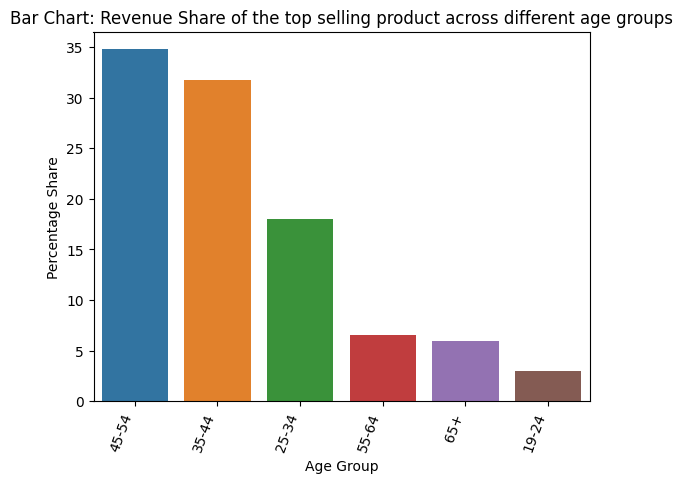

In [49]:
#Plotting this into a bar chart for better visualization

data = pf2[["age","percentage_share"]]
ax = sns.barplot(x='age', y='percentage_share', data=data)

# Rotate x-axis labels by 70 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha="right")

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Percentage Share')
plt.title('Bar Chart: Revenue Share of the top selling product across different age groups')


In [50]:
#Target age-groups for potential cross sells & upsells

#calculating index threshold
index_threshold = np.argmax(np.array(pf2["cumulative_percenatge_share"])>=80)

print(f'3 age groups contribute to more than 80% of revenue generated from the top selling product')
pf2[:index_threshold+1]

3 age groups contribute to more than 80% of revenue generated from the top selling product


,age,sales,total_sales,percentage_share,cumulative_percenatge_share
3,45-54,68898.16,198106.7,34.778309,34.778309
2,35-44,62854.42,198106.7,31.727559,66.505868
1,25-34,35686.36,198106.7,18.013707,84.519575


### Insight:

#### Further, we want to check potential cross sell & upsells products for these age groups who tend to visit the gas stations more than the other age groups. For this, we deploy a Market Basket Analysis that uses the Association rule that is modelled by the Apriori algorithm. This algorithm helps us identify products that have most frequently purchased together. This serves as a good insight for designing marketing campaigns and further penetrating these age groups that have a high spend / high purchasing pattern at Gas stations

## Business Problem

### 3. Market Basket Analysis (Association rule/Apriori rule) : Do certain products tend to be purchased with other products on a regular basis? For example, when customers purchase milk, do they often purchase bread at the same time? Identifying these relationships can help marketing develop paired product marketing plans.

#### 2. Do certain products tend to be purchased with other products on a regular basis? For example, when customers purchase milk, do they often purchase bread at the same time? Identifying these relationships can help marketing develop paired product marketing plans.

In [51]:
#loading the necessary libraries
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [52]:
#creating a new dataframe with only required columns to reduce compute time of the algorithm

pf3 = pd.merge(transactions,products,on='product_id',how='left')
pf3.head(5)

,household_id,store_id,basket_id,product_id,quantity,sales_value,retail_disc,coupon_disc,coupon_match_disc,week,transaction_timestamp,manufacturer_id,department,brand,product_category,product_type,package_size
0,900,330,3.119857e+10,1095275.0,1,0.50,0.00,0.0,0.0,1,2017-01-01 06:53:26,2.0,PASTRY,National,ROLLS,ROLLS: BAGELS,4 OZ
1,900,330,3.119857e+10,9878513.0,1,0.99,0.10,0.0,0.0,1,2017-01-01 07:10:28,69.0,GROCERY,Private,FACIAL TISS/DNR NAPKIN,FACIAL TISSUE & PAPER HANDKE,85 CT
2,1228,406,3.119866e+10,1041453.0,1,1.43,0.15,0.0,0.0,1,2017-01-01 07:26:30,69.0,GROCERY,Private,BAG SNACKS,POTATO CHIPS,11.5 OZ
3,906,319,3.119871e+10,1020156.0,1,1.50,0.29,0.0,0.0,1,2017-01-01 07:30:27,2142.0,GROCERY,National,REFRGRATD DOUGH PRODUCTS,REFRIGERATED BAGELS,17.1 OZ
4,906,319,3.119871e+10,1053875.0,2,2.78,0.80,0.0,0.0,1,2017-01-01 07:30:27,2326.0,GROCERY,National,SEAFOOD - SHELF STABLE,TUNA,5.0 OZ


In [53]:
#Converting basket_id to string format for better readability 
pf3['basket_id'] = pf3['basket_id'].astype('str')

#Subsetting the dataset to required columns only & transforming it in the required form
myretaildata = pf3[['basket_id','product_type','quantity']]
mybasket = myretaildata.groupby(['basket_id','product_type'])['quantity'].sum().unstack().reset_index().fillna(0).set_index('basket_id')
mybasket.head()

product_type,4-20 BOYS TEAM SPORT,ABRASIVES,ACCENT FURNITURE,ACCESSORIES,ACNE MEDICATIONS,ACTIVITY,ADDITIVES/FLUIDS,ADHESIVES/CAULK,ADULT ANALGESICS,ADULT CEREAL,...,WREATHS/TINSEL/GARLAND,WRITING INSTRUMENTS,XMAS PLUSH,YEAST: DRY,YELLOW JACKET,YELLOW SUMMER SQUASH,YNG MEN SCREEN PRINT T-SHIRTS,YOGURT,YOGURT MULTI-PACKS,YOGURT NOT MULTI-PACKS
basket_id,,,,,,,,,,,,,,,,,,,,,
31198437603.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31198445400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31198445429.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31198445465.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31198452527.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
#creating flags for units
# converting all positive values to 1 and everything else as 0
def my_encode_units(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

my_basket_sets = mybasket.map(my_encode_units)
my_basket_sets.head()

product_type,4-20 BOYS TEAM SPORT,ABRASIVES,ACCENT FURNITURE,ACCESSORIES,ACNE MEDICATIONS,ACTIVITY,ADDITIVES/FLUIDS,ADHESIVES/CAULK,ADULT ANALGESICS,ADULT CEREAL,...,WREATHS/TINSEL/GARLAND,WRITING INSTRUMENTS,XMAS PLUSH,YEAST: DRY,YELLOW JACKET,YELLOW SUMMER SQUASH,YNG MEN SCREEN PRINT T-SHIRTS,YOGURT,YOGURT MULTI-PACKS,YOGURT NOT MULTI-PACKS
basket_id,,,,,,,,,,,,,,,,,,,,,
31198437603.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31198445400.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31198445429.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31198445465.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31198452527.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Training the Model

In [55]:
# generating frequent itemsets
my_basket_sets = my_basket_sets.astype(bool)
my_frequent_itemsets = apriori(my_basket_sets,min_support = 0.03,use_colnames = True)

In [56]:
# generating rules
my_rules = association_rules(my_frequent_itemsets,metric = 'lift',min_threshold = 1)
my_rules.head(100)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(BANANAS),(FLUID MILK WHITE ONLY),0.111015,0.222982,0.057554,0.518431,2.324992,0.032799,1.613513,0.641058
1,(FLUID MILK WHITE ONLY),(BANANAS),0.222982,0.111015,0.057554,0.258110,2.324992,0.032799,1.198270,0.733433
2,(DAIRY CASE 100% PURE JUICE - O),(FLUID MILK WHITE ONLY),0.057714,0.222982,0.034234,0.593166,2.660154,0.021365,1.909913,0.662307
3,(FLUID MILK WHITE ONLY),(DAIRY CASE 100% PURE JUICE - O),0.222982,0.057714,0.034234,0.153529,2.660154,0.021365,1.113193,0.803175
4,(KIDS CEREAL),(FLUID MILK WHITE ONLY),0.046331,0.222982,0.030585,0.660150,2.960556,0.020254,2.286355,0.694398
5,(FLUID MILK WHITE ONLY),(KIDS CEREAL),0.222982,0.046331,0.030585,0.137165,2.960556,0.020254,1.105274,0.852265
6,(MAINSTREAM WHITE BREAD),(FLUID MILK WHITE ONLY),0.095797,0.222982,0.050038,0.522331,2.342484,0.028677,1.626688,0.633821
7,(FLUID MILK WHITE ONLY),(MAINSTREAM WHITE BREAD),0.222982,0.095797,0.050038,0.224402,2.342484,0.028677,1.165815,0.737567
8,(SHREDDED CHEESE),(FLUID MILK WHITE ONLY),0.077282,0.222982,0.038256,0.495012,2.219969,0.021023,1.538688,0.595570
9,(FLUID MILK WHITE ONLY),(SHREDDED CHEESE),0.222982,0.077282,0.038256,0.171564,2.219969,0.021023,1.113807,0.707246


In [57]:
# Filtering rules based on condition
my_rules[(my_rules['confidence']>=0.45) & (my_rules['lift']>=2.3)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(BANANAS),(FLUID MILK WHITE ONLY),0.111015,0.222982,0.057554,0.518431,2.324992,0.032799,1.613513,0.641058
2,(DAIRY CASE 100% PURE JUICE - O),(FLUID MILK WHITE ONLY),0.057714,0.222982,0.034234,0.593166,2.660154,0.021365,1.909913,0.662307
4,(KIDS CEREAL),(FLUID MILK WHITE ONLY),0.046331,0.222982,0.030585,0.660150,2.960556,0.020254,2.286355,0.694398
6,(MAINSTREAM WHITE BREAD),(FLUID MILK WHITE ONLY),0.095797,0.222982,0.050038,0.522331,2.342484,0.028677,1.626688,0.633821
